In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#Define our different forecast horizons
H1 = 1
H2 = 5
H3 = 10

In [85]:
#Read in the data
data = pd.read_csv('../EURUSD Detailed Market Data As Series Moving Average.csv')

#Label the data
data['Target 1'] = data['True MA C'].shift(-H1)
data['Target 2'] = data['True MA C'].shift(-H2)
data['Target 3'] = data['True MA C'].shift(-H3)
data['Target 4'] = data['True MA H'].shift(-H1)
data['Target 5'] = data['True MA H'].shift(-H2)
data['Target 6'] = data['True MA H'].shift(-H3)
data['Target 7'] = data['True MA L'].shift(-H1)
data['Target 8'] = data['True MA L'].shift(-H2)
data['Target 9'] = data['True MA L'].shift(-H3)

#Drop missing rows
data = data.iloc[:-H3,:]
data

Time  True Open  True High  True Low  True Close  \
0     2016.01.11 00:00:00    1.08560    1.09370   1.09455     1.08476   
1     2016.01.12 00:00:00    1.08428    1.08560   1.08999     1.08193   
2     2016.01.13 00:00:00    1.08852    1.08428   1.08883     1.08046   
3     2016.01.14 00:00:00    1.08567    1.08852   1.09429     1.08342   
4     2016.01.15 00:00:00    1.09132    1.08567   1.09844     1.08561   
...                   ...        ...        ...       ...         ...   
2984  2025.08.07 00:00:00    1.16769    1.16630   1.16988     1.16110   
2985  2025.08.08 00:00:00    1.16409    1.16774   1.16794     1.16288   
2986  2025.08.10 00:00:00    1.16476    1.16454   1.16512     1.16422   
2987  2025.08.11 00:00:00    1.16163    1.16476   1.16755     1.15901   
2988  2025.08.12 00:00:00    1.16776    1.16164   1.16972     1.15986   

      True MA C  True MA O  True MA H  True MA L  Diff Open  ...  \
0      1.088382   1.086122   1.091684   1.081018    0.01134  ...   
1      1.089712   1.088238   1.093698   1.083150    0.01058  ...   
2      1.088910   1.089564   1.092666   1.083828    0.00663  ...   
3      1.087554   1.088762   1.092926   1.084456   -0.00401  ...   
4      1.087078   1.087554   1.093220   1.083236   -0.00604  ...   
...         ...        ...        ...        ...        ...  ...   
2984   1.161800   1.160124   1.162824   1.156614    0.02409  ...   
2985   1.162864   1.161810   1.164468   1.157628    0.00843  ...   
2986   1.164138   1.162964   1.165716   1.159480    0.00577  ...   
2987   1.164894   1.164238   1.167468   1.160728    0.00637  ...   
2988   1.165186   1.164996   1.168042   1.161414    0.00379  ...   

      Diff MA Low 2  Target 1  Target 2  Target 3  Target 4  Target 5  \
0         -0.000784  1.089712  1.088322  1.086618  1.093698  1.092856   
1          0.005122  1.088910  1.089310  1.084710  1.092666  1.093326   
2          0.007438  1.087554  1.089810  1.083548  1.092926  1.094338   
3          0.008908  1.087078  1.090156  1.083298  1.093220  1.094994   
4          0.004962  1.088322  1.089052  1.084174  1.092856  1.093722   
...             ...       ...       ...       ...       ...       ...   
2984       0.010590  1.162864  1.165892  1.167388  1.164468  1.168670   
2985       0.011740  1.164138  1.166086  1.167394  1.165716  1.169384   
2986       0.012980  1.164894  1.167196  1.165582  1.167468  1.170664   
2987       0.011676  1.165186  1.168996  1.165876  1.168042  1.171460   
2988       0.009190  1.165892  1.168804  1.166682  1.168670  1.171728   

      Target 6  Target 7  Target 8  Target 9  
0     1.092428  1.083150  1.084430  1.083324  
1     1.089908  1.083828  1.085412  1.081728  
2     1.088262  1.084456  1.086502  1.080340  
3     1.086228  1.083236  1.087276  1.079252  
4     1.086138  1.084430  1.085694  1.080718  
...        ...       ...       ...       ...  
2984  1.170982  1.157628  1.162604  1.165496  
2985  1.170156  1.159480  1.162648  1.165316  
2986  1.169108  1.160728  1.162740  1.164382  
2987  1.169654  1.161414  1.165012  1.161964  
2988  1.169994  1.162604  1.166126  1.163028  

[2989 rows x 26 columns]

In [86]:
X = data.iloc[:,1:-9]
y = data.iloc[:,-9:]

In [87]:
X_train      = X.iloc[:-(365*3),:]
y_train      = y.iloc[:-(365*3),:]
X_test       = X.iloc[-(365*3):,:]
y_test       = y.iloc[-(365*3):,:]

In [88]:
from sklearn.linear_model   import LinearRegression
from sklearn.neural_network import MLPRegressor

In [89]:
model = LinearRegression()

In [90]:
model.fit(X,y)

LinearRegression()

In [91]:
preds = pd.DataFrame(model.predict(X_test))

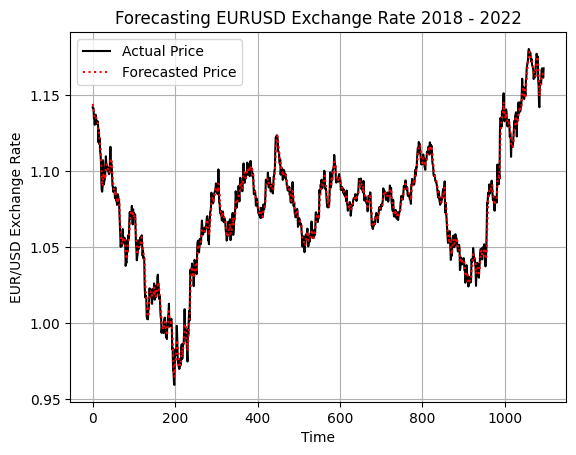

In [92]:
preds = pd.DataFrame(model.predict(X_test.iloc[:,:]))
plt.plot(X_test.iloc[:,0].reset_index(drop=True),color='black')
plt.plot(preds.iloc[:,0],color='red',linestyle=':')
plt.grid()
plt.title('Forecasting EURUSD Exchange Rate 2018 - 2022')
plt.ylabel('EUR/USD Exchange Rate')
plt.xlabel('Time')
plt.legend(['Actual Price','Forecasted Price'])

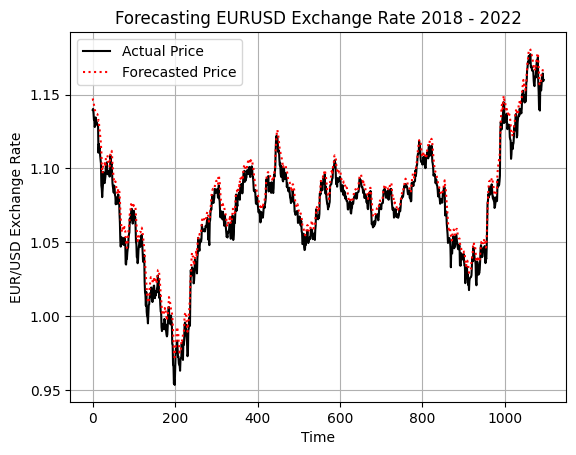

In [93]:
preds = pd.DataFrame(model.predict(X_test.iloc[:,:]))
plt.plot(X_test.iloc[:,3].reset_index(drop=True),color='black')
plt.plot(preds.iloc[:,3],color='red',linestyle=':')
plt.grid()
plt.title("Forecasting EURUSD Exchange Rate 2018 - 2022")
plt.ylabel('EUR/USD Exchange Rate')
plt.xlabel('Time')
plt.legend(['Actual Price','Forecasted Price'])

In [94]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_types = [("FLOAT INPUT",FloatTensorType([1,X.shape[1]]))]
final_types = [("FLOAT OUTPUT",FloatTensorType([y.shape[1],1]))]

model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)

onnx.save(model_proto,"EURUSD MFH LR D1.onnx")

In [78]:
X.shape[1]

16

In [79]:
y.shape[1]

9

In [ ]:
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

Let Us Aim For Deeper Optimization

In [15]:
train_inputs, validation_inputs   = X_train.iloc[:X_train.shape[0]//2,:],X_train.iloc[X_train.shape[0]//2:,:]
train_targets, validation_targets = y_train.iloc[:y_train.shape[0]//2,:],y_train.iloc[y_train.shape[0]//2:,:]

In [45]:
#Initialize the model
model = MLPRegressor(random_state=0,max_iter=1000,hidden_layer_sizes=(X_train.shape[1],100,20,50,10),shuffle=False,early_stopping=False)

#List tuning parameters
distributions = dict(activation=['identity','relu','logistic','tanh'],
                     solver=['adam','sgd','lbfgs'],
                     learning_rate=['constant','invscaling','adaptive'])

In [46]:
RSCV = RandomizedSearchCV(model,distributions,random_state=0,n_jobs=-1,n_iter=30,refit=True)

In [47]:
search = RSCV.fit(X_train.iloc[:,1:-9],y_train.iloc[:,-9:])
search.best_params_

{'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'tanh'}

In [48]:
model = MLPRegressor(random_state=0,max_iter=1000,hidden_layer_sizes=(X_train.shape[1],100,20,50,10),shuffle=False,early_stopping=False
                     ,solver='lbfgs',loss='squared_error',learning_rate='constant',activation='tanh')

model.fit(X,y)


MLPRegressor(activation='tanh', hidden_layer_sizes=(16, 100, 20, 50, 10),
             max_iter=1000, random_state=0, shuffle=False, solver='lbfgs')

In [49]:
initial_types = [("FLOAT INPUT",FloatTensorType([1,X_train.shape[1]]))]
final_types = [("FLOAT OUTPUT",FloatTensorType([y_train.shape[1],1]))]

model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)

onnx.save(model_proto,"EURUSD MFH NN RSCV D1.onnx")

In [8]:
model.predict(X_test)

NameError: name 'model' is not defined